<p style='text-align: right;'><b>Data Scientist :</b> Ruslan S.</p>
<p style='text-align: right;'><b>Collaborator :</b> Luka Anicin</p>
<h1 style='text-align: center;'>Sentiment Analysis - Natural Language Processing</h1>
<h3>Steps : Data Wrangling, Exploratory Data Analysis (EDA)</h3>
<p><b>Introduction: </b>Natural language processing (NLP) relates to the branch of computer science (artificial intelligence or AI) and is concerned with giving machines the ability to understand text and spoken words in a much similar way as human beings can.</p>  
<p>Sentiment Analysis is the classification of people's feelings or expressions into different viewpoints. Sentiments could be Positive, Negative, Neutral, and so on. The process is done in different consumer-centered branches to investigate human opinions on a singular product or topic.</p>
<img src='img/2.jpg'>
<br><br><b>DATA STAGES:</b>
<ul>
    <li>Text iput</li>
    <li>Tokenization</li>
    <li>Stop Word Filtering</li>
    <li>Negation</li>
    <li>Stemming</li>
    <li>Classification</li>
    <li>Sentiment Class</li>
</ul>

<h3>IMPORT LIBRARIES/PACKAGES...</h3>

In [89]:
# loading
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

import tensorflow as tf

import re

import nltk # It's a library that performs text processing tasks for Natural Language Processing
nltk.download('stopwords') 
from nltk.corpus import stopwords # English words which does not add much meaning to a sentence
from nltk.stem import SnowballStemmer # Stemmers remove morphological affixes from words, leaving only the word stem

from wordcloud import WordCloud # It's a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import LabelEncoder # Encode target labels with value between 0 and n_classes-1

from keras.preprocessing.text import Tokenizer # Text tokenization utility class
from keras.preprocessing.sequence import pad_sequences # It makes all the sequence in one constant length

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rshul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>DATA CLEANING...</h3>

In [90]:
# loading data
path = "../data/raw/raw.csv"
df = pd.read_csv(filepath_or_buffer=path, header=None, encoding='latin')
df.head(3)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [91]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [92]:
# renaming columns
def renaming_df(df, col_names):
    df.columns = col_names
    print(df.head(3))
    return df

col_names = ['target', 'id', 'date', 'query', 'user_name', 'predictor']
df = renaming_df(df, col_names)

   target          id                          date     query  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   

         user_name                                          predictor  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  


<p><b>NOTE: </b>For our task, we need only two columns: target (sentiment level) and predictor (text/values). Others columns could be dropped.</p>

In [93]:
# dropping unnecessary columns
def drop_cols(df, col_names):
    df = df.drop(labels=col_names, axis=1)
    print(df.head(3))
    return df

col_names_drop = ['id', 'date', 'query', 'user_name']
df = drop_cols(df, col_names_drop)

   target                                          predictor
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...


In [94]:
# checking unique values for target column
df['target'].unique()

array([0, 4], dtype=int64)

In [95]:
# replacing 'Zero' value with word 'Negative' and 'Four' value with word 'Positive'
def col_substitution(df, col_name, dic_val):
    df[col_name] = df[col_name].map(dic_val)
    print("Unique values: ", df[col_name].unique())
    print(df.head(5))
    return df

dic_val = {
    0: 'Negative',
    4: 'Positive',
}
df = col_substitution(df, 'target', dic_val)

Unique values:  ['Negative' 'Positive']
     target                                          predictor
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  Negative  is upset that he can't update his Facebook by ...
2  Negative  @Kenichan I dived many times for the ball. Man...
3  Negative    my whole body feels itchy and like its on fire 
4  Negative  @nationwideclass no, it's not behaving at all....


In [96]:
# checking missing values
print(df['target'].isnull().sum())
print(df['predictor'].isnull().sum())

0
0


In [97]:
# checking duplicates
print(df.duplicated().sum())

16309


In [98]:
# handling duplicates
def drop_duplicates_df(df):
    df = df.drop_duplicates(ignore_index=True)
    print(df.duplicated().sum())
    return df

df = drop_duplicates_df(df)

0


<b>NOTE:</b> Now we need to look at the distribution of our data. It's very important to have evenly divided data sets (classes) for avoiding any bias issues in future analysis.

Text(0.5, 1.0, 'Histogram of distributed target values')

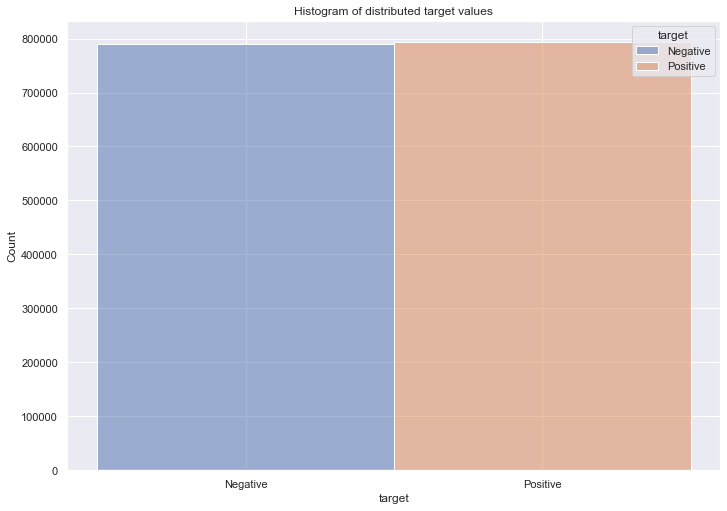

In [99]:
# analyzing destribuation
sns.histplot(data=df, x='target', hue='target').set_title('Histogram of distributed target values')

<b>NOTE:</b> As we can see we have pretty much-balanced class values.

In [100]:
# exploring predictor columns
df['predictor'].sample(10)

1288691    just showed a beautiful home in cleveland wow ...
1081389    @TheLettingAgent yep for sunshine, and yep for...
1525379    @scottmccloud Or weddings in Second Life...mig...
1439057                        Nando's - clears the sinuses 
1026589       going to chain reaction tomorrow, SWEET BAWLS 
479100                i just want to go get my phone fixed! 
591077     Free cut in Psych 108! Yay! Annoying how we st...
98865      @pratama - Yeah, sad  Oh well. MP3 playlist, h...
704888            @bennsu my Black Thought is there?!       
170984                             @DarkDevilM  what's wrong
Name: predictor, dtype: object

<b>NOTE:</b> As we can see the predictor column has raw data (data that should be cleaned). 

<h3>PRE-PROCESSING...</h3>

<p><b>NOTE:</b> Tweets consist of different types of values besides simple (relative) words. It could be hyperlinks, images, or punctuation marks. So, our work here is to remove all of this noise to make the prediction more accurate.</p>
<img src="img/1.jpeg" alt='Image cleaning'>

<p>Here, we are going to apply stemming and lemmatization. Stemming is the process of reducing inflected words to their word stem, base, or root form generally a written word form. Where lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.</p>
<img src="img/3.png" alt="StemmingAndLemmatization">

<p>Additionally, we will be dealing with user ids and hyperlinks in our string values.</p>
<img src="img/4.jpg" alt="Link">

<p>And finally, we will complete our pre-process by removing stop words. Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.</p>
<img src="img/5.png" alt='Stop words'>

In [101]:
# creating instances for Stopwords and Stemming
stop_words = stopwords.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [102]:
snow_stemmer = SnowballStemmer('english')
snow_stemmer

In [103]:
# regular expression pattern
re_patter = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [104]:
def cleaning_data(data, isStemming=False):
    """
    Removing all noise.
        data: the text
        isStemming: the process of getting the normal forms of the words
    """
    data = re.sub(re_patter, " ", str(data).lower()).strip()
    data = data.split()
    token_list = []
    for word in data:
        if word not in stop_words:
            if isStemming:
                token_list.append(snow_stemmer.stem(word))
            else:
                token_list.append(word)
    return " ".join(token_list)

In [105]:
# applying pre-processing
df['predictor'] = df['predictor'].apply(lambda x: cleaning_data(x))
df.sample(5)

,target,predictor
7487,Negative,missed first class well going lol much stuff r...
102214,Negative,hep b jab morn ouchie lol
290326,Negative,wsop4 omg many players waiting see final table...
41201,Negative,looking forward day rain rain rain
721806,Negative,missing quot quot n bff fun 2nite see ya next ...


<h3>VISUALIZATION...</h3>

In [106]:
# visualizing the ratio/frequencies of positive and negative words
# link: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
def show_word_cloud(class_val):
    mask = df['target'] == class_val
    predictor_values = " ".join(df[mask]['predictor'])

    max_words = 1800
    width = 1300
    height = 500
    
    word_cloud = WordCloud(max_words=max_words,
                          width=width,
                          height=height)
    word_cloud = word_cloud.generate(predictor_values)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

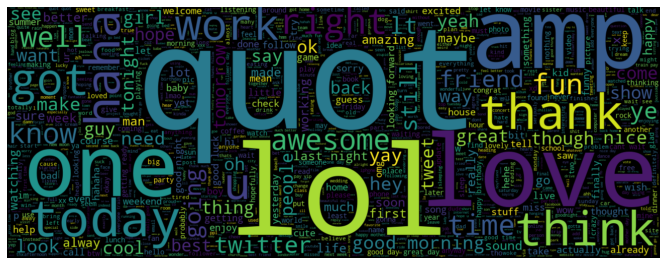

In [107]:
# show positives
show_word_cloud('Positive')

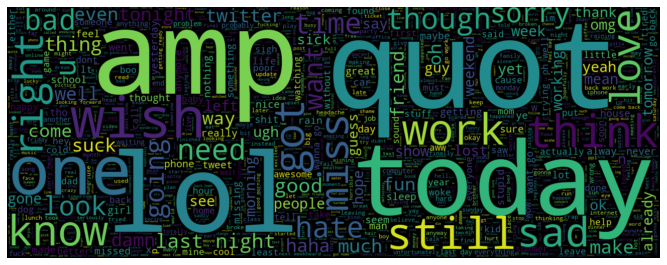

In [108]:
# show negatives
show_word_cloud('Negative')

<h3>TRAIN/TEST SPLIT...</h3>

In [109]:
# splitting our data
# link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape}\nTest size: {X_test.shape}")

Train size: (1266952, 2)
Test size: (316739, 2)


<h3>TOKENIZATION...</h3>

<p><b>NOTE: </b>Tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language. The various tokenization functions in-built into the nltk module itself and can be used in programs as shown below.</p>
<img src="img/6.jpg" alt="tokenization">

In [110]:
# applying tokenization
# link: https://www.kaggle.com/arunrk7/nlp-beginner-text-classification-using-lstm
token_instance = Tokenizer()
token_instance.fit_on_texts(X_train['predictor'])

In [111]:
wordIndex = token_instance.word_index
vocabSize = len(wordIndex) + 1
vocabSize

290412

In [112]:
temp_num = 10
for key, val in wordIndex.items():
    if temp_num > 0:
        print(key, val)
        temp_num -= 1

good 1
day 2
get 3
like 4
go 5
quot 6
today 7
love 8
going 9
work 10


In [113]:
# using pad_sequences to make the length of sequences the same. If it's too short adding pads, otherwise truncate it.
# link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
token_instance.texts_to_sequences

<bound method Tokenizer.texts_to_sequences of <keras_preprocessing.text.Tokenizer object at 0x000002C1A0A4B8E0>>

In [114]:
MAX_LENGTH = 25

def pad_trunc_funtion(data, col_name, max_length):
    return pad_sequences(token_instance.texts_to_sequences(data[col_name]),
                                     maxlen=max_length)

In [115]:
X_train_tokenized_pad = pad_trunc_funtion(X_train, 'predictor', MAX_LENGTH)
X_test_tokenized_pad = pad_trunc_funtion(X_test, 'predictor', MAX_LENGTH)

print(f"Training data shape: {X_train_tokenized_pad.shape}")
print(f"Testing data shape: {X_test_tokenized_pad.shape}")

Training data shape: (1266952, 25)
Testing data shape: (316739, 25)


In [116]:
# checking
X_train_tokenized_pad[:4]

array([[     0,      0,      0,      0,      0,      0,      0,      0,
         71148,     43,     61,     82,  28510,    398,     53,     58,
           255,   1909,   1470,  71149,    315,    462,    107,    107,
           107],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0, 104920,     75,   1121,
          6067,    254,   2005,    416,     71,    595,  24573,  56432,
            55],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,    124,    277,   6100,    276,   1258,
          4917],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,   4638,   4267,    118,
          4638]])

In [117]:
# creating variable with unique target values (classes)
classes = list(X_train['target'].unique())
classes

['Positive', 'Negative']

<h3>LABEL ENCODING...</h3>

<p><b>NOTE: </b>Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.</p>

In [118]:
# applying encoding and reshaping
encoder = LabelEncoder().fit(list(X_train['target']))

y_train = encoder.transform(list(X_train['target']))
y_test = encoder.transform(list(X_test['target']))

y_train.shape, y_test.shape

((1266952,), (316739,))

In [121]:
list(y_train[:15])

[1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]

In [122]:
# reshaping 
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train.shape, y_test.shape

((1266952, 1), (316739, 1))

In [124]:
y_train[:15]

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

<h3>WORD EMBEDDING...</h3>

<p><b>NOTE: </b>Word Embedding is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. ... The input layer contains the context words and the output layer contains the current word.</p>
<img src="img/7.png" alt="word embedding">

In [178]:
# we're going to use GloVe: global vectors for word representation
# link: https://nlp.stanford.edu/projects/glove/
WORD_EMBEDDING = "../temp/glove.6B/glove.6B.50d.txt"
EMBEDDING_DIMENSION = 50
LR = 1e-3
BATCH_SIZE = 1000
EPOCHS = 12

In [155]:
def open_read_word_embedding(path_file):
    counter = 0
    word_vectors = {}
    
    with open(path_file, mode='r', encoding="utf8") as we:
        try:
            for i in we:
                list_of_values = i.split()
                key = list_of_values[0]
                coefs = np.asarray(list_of_values[1:], dtype='float32')
                word_vectors[key] = coefs
        except:
            counter += 1
            print(we)
            
    print(f"There is/are {counter} lines with error.")
    return word_vectors

In [156]:
embedding_idx = open_read_word_embedding(WORD_EMBEDDING)
print(len(embedding_idx))

There is/are 0 lines with error.
400000


In [179]:
embedding_mtx = np.zeros((vocabSize, EMBEDDING_DIMENSION))
print(embedding_mtx.shape)
embedding_mtx[:1]

(290412, 50)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [193]:
counter = 0

for key, value in wordIndex.items():
    if key in embedding_idx:
        vector = embedding_idx[key]
        embedding_mtx[value-1] = vector
        counter += 1
        
print(f"{counter} out of {len(embedding_mtx)} vectors were placed into matrix")

91422 out of 290412 vectors were placed into matrix
